In [48]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
plt.style.use('seaborn')
% matplotlib inline

In [49]:
X_train = pd.read_csv("./datasets/logisticX.csv").values
y_train = pd.read_csv("./datasets/logisticY.csv").values
data = np.hstack((X_train,y_train))
X_train = np.hstack(((np.ones((X_train.shape[0],1)),X_train)))
plot1 = data[data[:,2]==0]
plot2 = data[data[:,2]==1]
print(y_train.shape)

(99, 1)


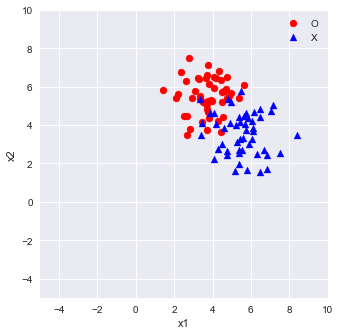

In [50]:
fig = plt.figure(figsize=(4,4))
axis = fig.add_axes([0,0,1,1])
axis.scatter(plot1[:,0],plot1[:,1],c='r',marker='o',label="O")
axis.scatter(plot2[:,0],plot2[:,1],c='b',marker='^',label="X")
axis.set_xlim(-5,10)
axis.set_ylim(-5,10)
axis.set_xlabel("x1")
axis.set_ylabel("x2")
axis.legend()
plt.show()

In [51]:
# for loop implemetation
def hypothesis(X,theta): 
    return sigmoid(X@theta)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))
    
def error(X_t, y_t, theta):
    h = hypothesis(X_t,theta)
    return (-0.5*np.sum((y_t)*np.log(h)+(1-y_t)*np.log(1-h),axis=0))/X_t.shape[0];

def gradient(X_t, y_t, theta):
    return (np.transpose(X_t)@(hypothesis(X_t,theta)-y_t))/X_t.shape[0]

def gradient_descent(X_t, y_t, alpha, max_itr,threshold =0.0001):
    grad = np.zeros((X_t.shape[1],1))
    theta = np.zeros((X_t.shape[1],1))
    err = []
    acc = []
    
    for x in range(max_itr):
        grad = gradient(X_t, y_t, theta)
        theta = theta - alpha * grad
        err.append(error(X_t, y_t, theta))
        acc.append(accuracy(X_t, y_t, theta))
        if len(err) > 1 and (abs(err[x]-err[x-1])) < threshold:
            break
    return (theta,err,acc)

def gradient_batch_descent(X_t, y_t, alpha=0.01,max_itr=150, threshold=0.0001, batch_size=5):
    grad = np.zeros((X_t.shape[1],1))
    theta = np.zeros((X_t.shape[1],1))
    err = []
    t_err = []
    t_acc = []
    acc = []
    m = X_t.shape[0]
    for x in range(max_itr):
        for i in range(int(m/batch_size)):
            err = []
            acc = []
            grad = gradient(X_t[i*batch_size:(i+1)*batch_size,:], y_t[i*batch_size:(i+1)*batch_size],theta)
            theta = theta - alpha*grad;
            acc.append(accuracy(X_t, y_t, theta))
            err.append(error(X_t[i*batch_size:(i+1)*batch_size,:], y_t[i*batch_size:(i+1)*batch_size],theta))
        t_err.append(np.mean(err))
        t_acc.append(np.mean(acc))
        if len(t_err) > 1 and abs(np.mean(t_err[:])-np.mean(t_err[:-1])) <threshold:
            break
    return (theta,t_err,t_acc)

def predict(X_t,theta):
    return hypothesis(X_t,theta) > 0.5

def accuracy(X_t,y_t,theta):
    return np.sum(predict(X_t,theta)==y_t,axis=0)/(y_t.shape[0])

## Gradient descent

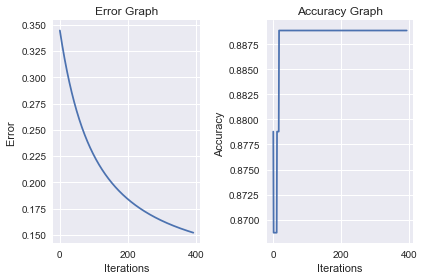

0.8881949263628655


In [59]:
(theta, err, acc) = gradient_descent(X_train,y_train,alpha=0.01,max_itr=500)
plt.subplot(121)
plt.plot(err)
plt.title("Error Graph")
plt.xlabel("Iterations")
plt.ylabel("Error ")
plt.subplot(122)
plt.plot(acc)
plt.title("Accuracy Graph")
plt.xlabel("Iterations")
plt.ylabel("Accuracy ")
plt.tight_layout()
plt.show()
print(np.mean(acc))

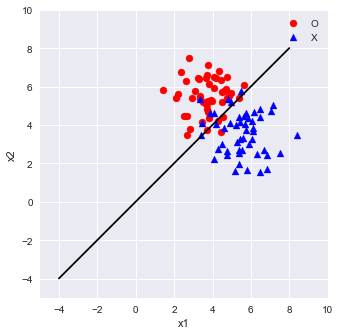

In [53]:
# visualizing decsion boundary
x1 = np.linspace(-4,8,10)
x2 = -(theta[1][0]*x1+theta[0][0])/theta[2][0]
fig = plt.figure(figsize=(4,4))
axis = fig.add_axes([0,0,1,1])
axis.scatter(plot1[:,0],plot1[:,1],c='r',marker='o',label="O")
axis.scatter(plot2[:,0],plot2[:,1],c='b',marker='^',label="X")
axis.plot(x1,x2,c='k')
axis.set_xlim(-5,10)
axis.set_ylim(-5,10)
axis.set_xlabel("x1")
axis.set_ylabel("x2")
axis.legend()
plt.show()

## Stochastic gradient descent (mini-batch)

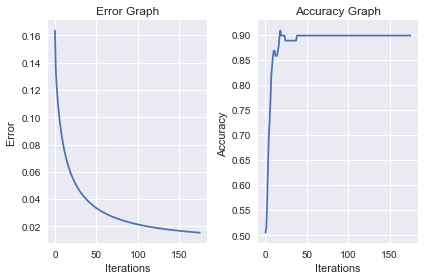

0.8852157943067034


In [58]:
(theta_b, err_b, acc_b) = gradient_batch_descent(X_train,y_train,alpha=0.01,max_itr=500)
plt.subplot(121)
plt.plot(err_b)
plt.title("Error Graph")
plt.xlabel("Iterations")
plt.ylabel("Error ")
plt.subplot(122)
plt.plot(acc_b)
plt.title("Accuracy Graph")
plt.xlabel("Iterations")
plt.ylabel("Accuracy ")
plt.tight_layout()
plt.show()
print(np.mean(acc_b))

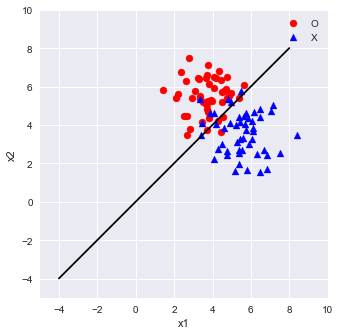

In [55]:
# visualizing decsion boundary
x1 = np.linspace(-4,8,10)
x2 = -(theta[1][0]*x1+theta[0][0])/theta[2][0]
fig = plt.figure(figsize=(4,4))
axis = fig.add_axes([0,0,1,1])
axis.scatter(plot1[:,0],plot1[:,1],c='r',marker='o',label="O")
axis.scatter(plot2[:,0],plot2[:,1],c='b',marker='^',label="X")
axis.plot(x1,x2,c='k')
axis.set_xlim(-5,10)
axis.set_ylim(-5,10)
axis.set_xlabel("x1")
axis.set_ylabel("x2")
axis.legend()
plt.show()

# SCIKIT LEARN IMPLEMENTATION

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
# learning model
lr_classifier = LogisticRegression(random_state=0);
lr_classifier.fit(X_train,y_train.reshape(-1));
print("Classification Accuracy: ",lr_classifier.score(X_train,y_train))

# 5 fold cross-validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_classifier,X=X_train,y=y_train.reshape(-1),cv=5)
print("Mean 5 fold cross-validation score: ",mean(scores))

Classification Accuracy:  0.8686868686868687
Mean 5 fold cross-validation score:  0.8789473684210527
